In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gaussianfunctions as gauss

from sklearn.mixture import GaussianMixture
import pandas as pd


### With BIC, 2 components

In [3]:
def EMGMM(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.GaussianEM(X,n_components,initial_param)
    gauss.PlotGMM(X,em,10)

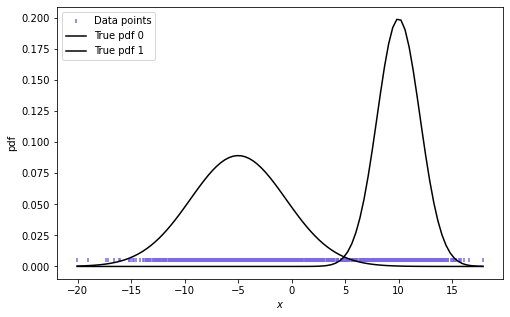

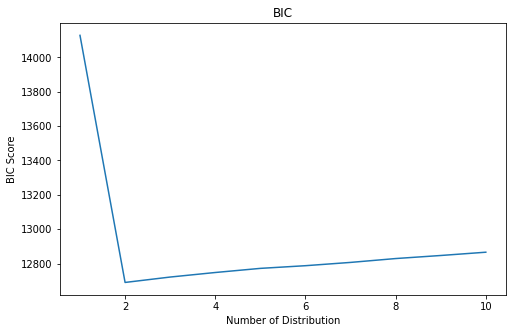

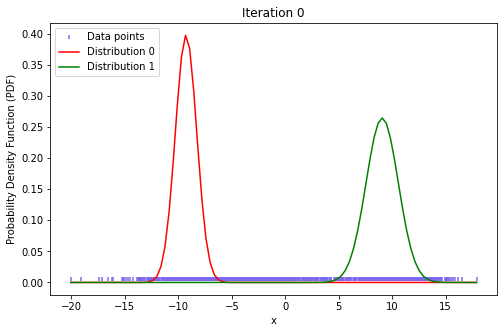

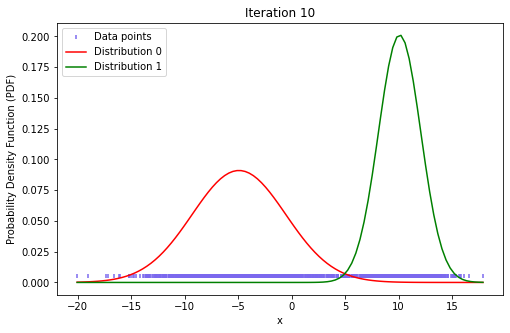

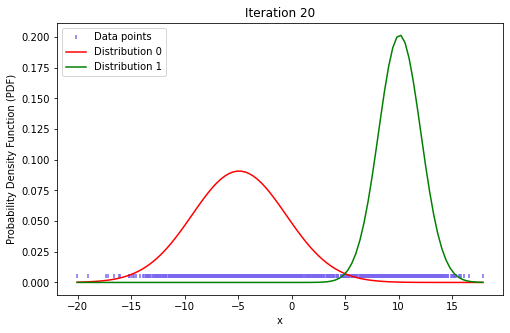

In [4]:
data=gauss.SimulateGMM(1000,10,4,-5,20)

gauss.PlotTrue(data,[10,-5],[4,20])
EMGMM(data,[])


### With BIC, 3 components

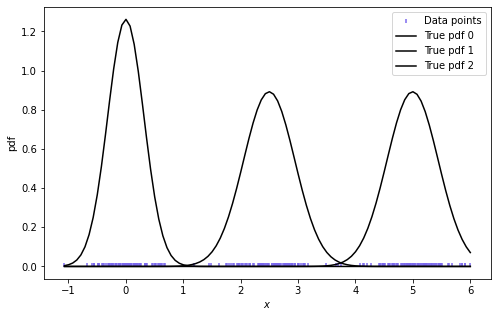

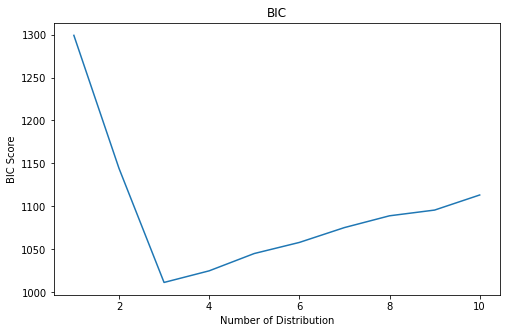

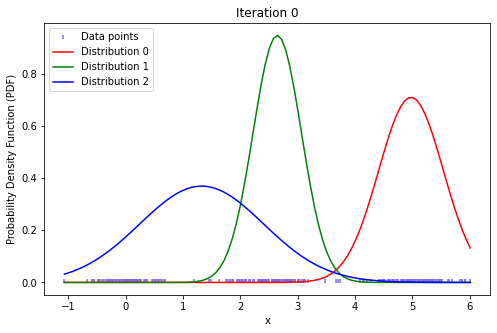

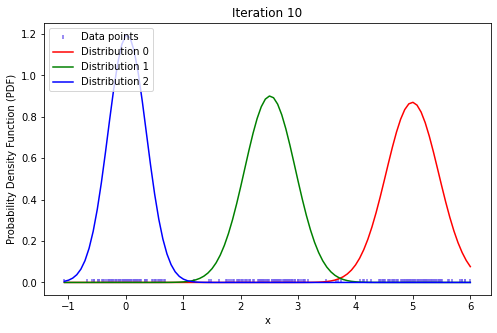

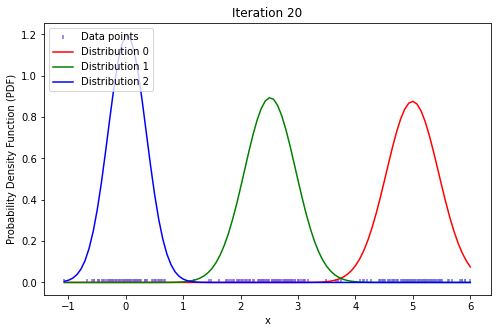

In [5]:
X1=np.random.normal(5,np.sqrt(0.2),100)
X2=np.random.normal(2.5,np.sqrt(0.2),100)
X3=np.random.normal(0,np.sqrt(0.1),100)
X=np.array(list(X1)+list(X2)+list(X3))

gauss.PlotTrue(X,[5,2.5,0],[0.2,0.2,0.1])
EMGMM(X,[])

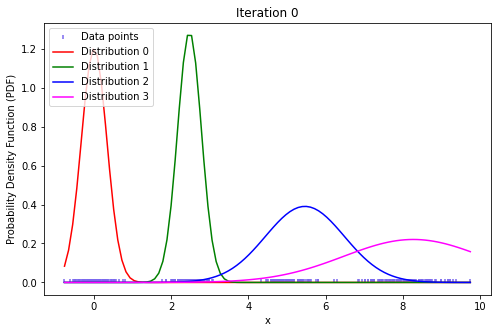

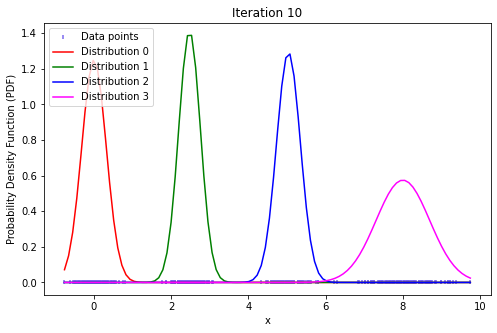

In [47]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))

# gauss.PlotTrue(D,[0,2.5,5,8],[0.1,0.1,0.1,0.5])
n_components=4
init=({
    'Mean':0.01,
    'Variance':0.4,
    'Weight':0.25
},{
    'Mean':2.5,
    'Variance':0.4,
    'Weight':0.25
},{
    'Mean':5,
    'Variance':0.4,
    'Weight':0.25
},{
    'Mean':10,
    'Variance':0.4,
    'Weight':0.25
})
em=gauss.GaussianEM(D,4,init)
gauss.PlotGMM(D,em,10)

### Trying the KIR dataset

In [63]:
#Generate data
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')
#print(X)

KIR2DL3_data=B['KIR2DL3'].to_numpy()

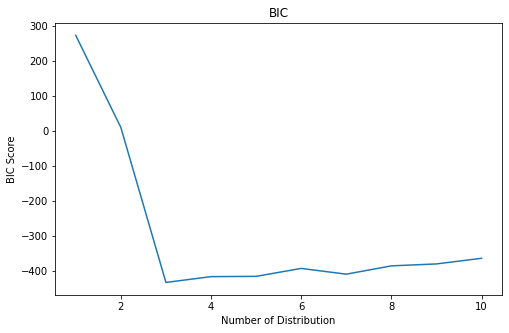

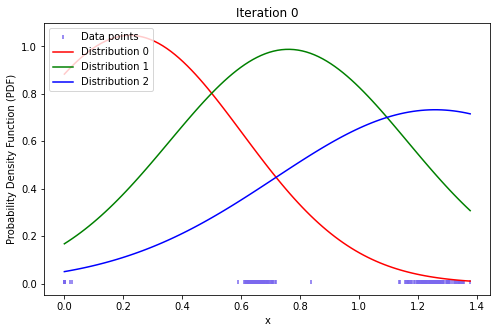

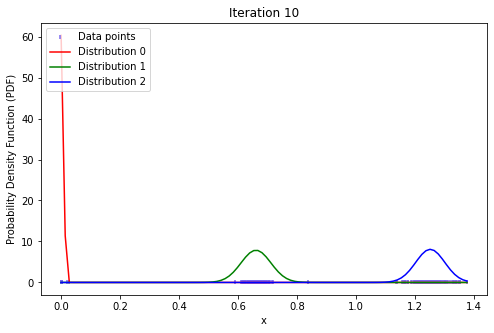

In [64]:
X=KIR2DL3_data
a=({
    'Mean':0.01,
    'Variance':0.1,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.1,
    'Weight':1/3
},{
    'Mean':1.8,
    'Variance':0.1,
    'Weight':1/3
})
EMGMM(X,a)


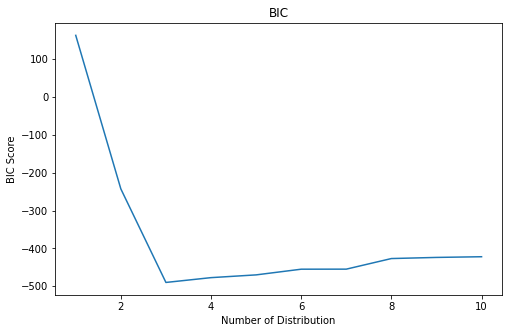

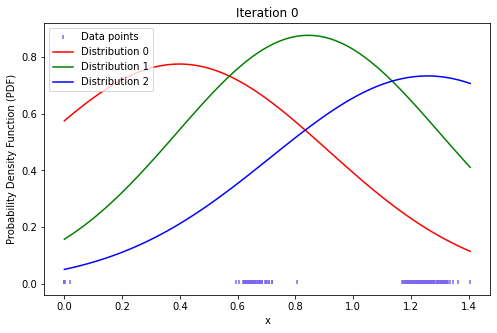

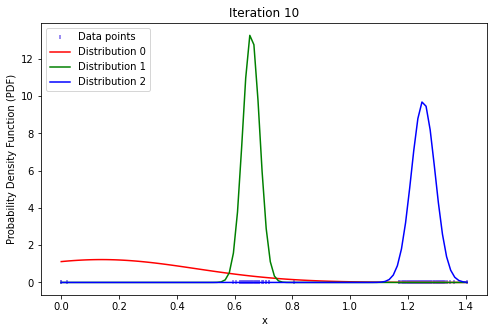

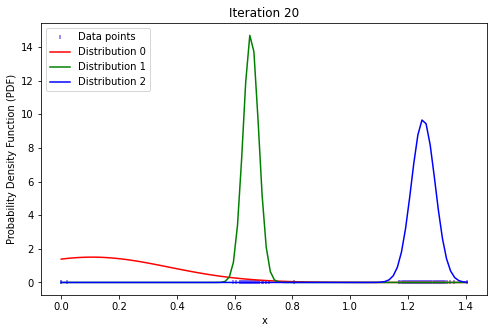

In [71]:
KIR2DP1_data=B['KIR2DP1'].to_numpy()
EMGMM(KIR2DP1_data,a)

### Use sklearn.mixture.GaussianMixture

In [72]:
from sklearn.mixture import GaussianMixture

def fitGauss(X):
    X=X.reshape(-1,1)
    gm=GaussianMixture(n_components=3).fit(X)
    N = np.arange(1, 11)
    models = [None for i in range(len(N))]

    for i in range(len(N)):
        models[i] = GaussianMixture(N[i]).fit(X)

    # compute the AIC and the BIC
    AIC = [m.aic(X) for m in models]
    BIC = [m.bic(X) for m in models]

    plt.figure(figsize=(8,5))
    M_best_BIC=models[np.argmin(BIC)]
    M_best_AIC=models[np.argmin(AIC)]

    b=np.linspace(np.min(X),np.max(X),100)

    log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
    log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

    resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
    resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

    pdf1=np.exp(log_prob1)
    pdf2=np.exp(log_prob2)


    # plt.plot(b,pdf1)
    plt.plot(b,pdf2)
    plt.hist(X,bins=75, density=True)

    plt.xlabel("$x$")
    plt.ylabel("Pdf")

    plt.show()

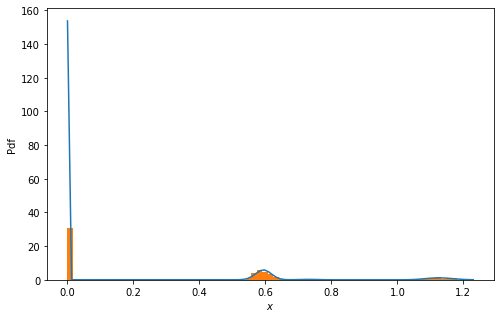

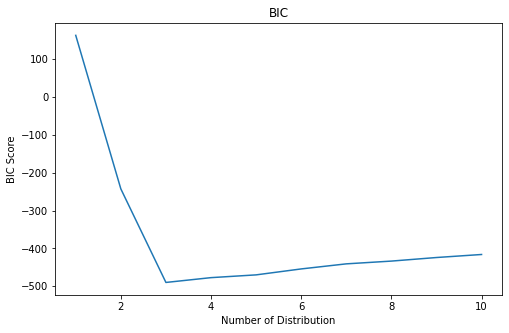

3

In [77]:
fitGauss(KIR2DS2_data)
gauss.BIC_gmm(KIR2DP1_data)